# Effects of Customers on Bike Rental Patterns
## Data Exploration - Ford GoBike System Data Analysis
### *Jhonatan Nagasako*
#### *28-FEB-2021*

## Investigation Overview

In this investigation in to the Ford GoBike system (i.e., bike renting service), I'm most interested in figuring out critical times and dates which high frequency of customers is expected. Thus, allowing strategies to be developed to create targeted marketing and lean staffing schedules.

The following features that will have the strongest effect in developing these strategies is by analyzing
1. Age
2. Gender
3. Ride duration
4. Days bikes rented
5. Times bikes rented
    
*New features were created for time and date as required. The final cleaned and tidied data was exported as a ```master.csv``` file, then read back into the report as a ```df```.*

## Dataset Overview

There are 183,215 ride entries in the dataset with 27 features (see above for details). Most variables are categorical in nature (specifically a data type of string). Data extraction of date, date day, and time (hr, min, etc.) was broken apart from the ```start_time``` and ```end_time```.
    
Also, the following assumptions were made for the data. First, the data only considers a two month span, Feb and Mar. secondly, the ride's start-days vs end-days were practically the same day. Lastly, the analysis of different locations which rides occurred is out of scope of this data project.

## Preliminary Wrangling

<font color='orange'>

### *__Please note to reader, details of any cleaning or tidying of the dataset can be seen in <a href="#assess">Section 2 - Assessing Data (Cleaning and Tidying) of the Notebook Report (not shown in this slide show)</a>__*

In [1]:
# import statements for all of the packages used for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm;

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline

In [2]:
# csv read into notebook again -- cleaned data
df = pd.read_csv('master.csv')

# high-level overview of data shape and composition
print('\n----Shape of File (row, column)---\n')
print(df.shape)
print('\n----Data Names---\n')
df.head(5)


----Shape of File (row, column)---

(183215, 27)

----Data Names---



,start_month,end_month,start_day_of_week,end_day_of_week,start_day,end_day,start_hour,end_hour,start_time,end_time,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip
0,FEB,MAR,THU,FRI,2019-02-28,2019-03-01,17:32:10.145000,08:01:55.975000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,...,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,35,Male,No
1,FEB,MAR,THU,FRI,2019-02-28,2019-03-01,18:53:21.789000,06:42:03.056000,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,...,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,0,0,No
2,FEB,MAR,THU,FRI,2019-02-28,2019-03-01,12:13:13.218000,05:24:08.146000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,...,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,47,Male,No
3,FEB,MAR,THU,FRI,2019-02-28,2019-03-01,17:54:26.010000,04:02:36.842000,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,...,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,30,Other,No
4,FEB,MAR,THU,FRI,2019-02-28,2019-03-01,23:54:18.549000,00:20:44.074000,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,...,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,45,Male,Yes


In [3]:
print('\n----Basic Statitics of Dataframe---\n')
df.describe()


----Basic Statitics of Dataframe---



,duration_hr,duration_min,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000
mean,0.201639,12.098367,725.902017,138.590427,37.771615,-122.353104,136.249123,37.771820,-122.352689,4473.218792,1895.288475,32.607909
std,0.498633,29.917978,1795.078654,111.778864,0.098914,0.116387,111.515131,0.098819,0.115961,1665.249372,412.013105,12.067822
min,0.016944,1.016667,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,0.000000,0.000000
25%,0.090278,5.416667,325.000000,47.000000,37.770407,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1979.000000,26.000000
50%,0.142778,8.566667,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,31.000000
75%,0.221111,13.266667,796.000000,239.000000,37.797280,-122.287180,235.000000,37.797320,-122.288665,5503.000000,1992.000000,38.000000
max,23.734444,1424.066667,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,99.000000


##  Univariate Exploration

## Figure 0 - Age Distribution of Riders

1. The data was trimmed to 100 years old based on [research of oldest living person](https://www.google.com/search?q=oldest+person+alive&rlz=1C1GCEB_enUS893US893&oq=oldest+person&aqs=chrome.0.0i433j69i57j0l2j0i67j0l5.3255j0j7&sourceid=chrome&ie=UTF-8). As expected, that data is right skewed. Interestingly enough, the 95 percentiles was 55 years old, despite the maximum being 100 years old. The 5th percentile rider age was 22 years old. The mean age of riders (regardless of gender) was about 34.2 years old.
2. No transformations additional transformations was required for the data analysis.
3. There was ages with "0 years old" and also astronomically old ages calculated.
4. Data was filtered to remove ages less than 1 years hold and trimmed to 100 year old (based on research of the [2010 U.S. Census Bureu](https://www.census.gov/prod/cen2010/briefs/c2010br-03.pdf)). Ages with 0 years old calculated is unlikely to have the ability to ride a bike... This was supported by the fact that the 5th percentile rider's age was 22 years old. Additionally, for the scope of this report 100 years old was chosen based on the fact that the 95th percentile rider's age was 55 years old.

In [4]:
# get the information we need for age, days of week, and time used, define as df_opperunity
# make a copy for futher manipulation
df_oppertunity = df[['start_day_of_week', 'end_day_of_week', 'start_day', 'end_day', 
                    'start_hour', 'end_hour', 'duration_hr', 'duration_min',
                   'member_birth_year', 'age', 'member_gender']].copy()
df_oppertunity.head(2)

,start_day_of_week,end_day_of_week,start_day,end_day,start_hour,end_hour,duration_hr,duration_min,member_birth_year,age,member_gender
0,THU,FRI,2019-02-28,2019-03-01,17:32:10.145000,08:01:55.975000,14.495833,869.750000,1984,35,Male
1,THU,FRI,2019-02-28,2019-03-01,18:53:21.789000,06:42:03.056000,11.811389,708.683333,0,0,0


In [5]:
# close look at min age
print('BEFORE Shape = ', df_oppertunity.shape)
print('\nBEFORE FILTER, Zero Count = ',df_oppertunity.age.isin([0]).sum())
print('\nBEFORE Basic stats of age\n', df_oppertunity.age.describe())

#filter out ZERO, create prototype set
filter1 = df_oppertunity

filter2 = filter1[filter1['age'] > 1]

print('\n\n====ZERO REMOVAL PROCESSING=====\n\n')
print('AFTER Shape = ', filter2.shape)
print('\nAFTER FILTER, Zero Count = ',filter2.age.isin([0]).sum())
print('\nAFTER Basic stats of age\n', filter2.age.describe())

BEFORE Shape =  (183215, 11)

BEFORE FILTER, Zero Count =  8335

BEFORE Basic stats of age
 count    183215.000000
mean         32.607909
std          12.067822
min           0.000000
25%          26.000000
50%          31.000000
75%          38.000000
max          99.000000
Name: age, dtype: float64


====ZERO REMOVAL PROCESSING=====


AFTER Shape =  (174880, 11)

AFTER FILTER, Zero Count =  0

AFTER Basic stats of age
 count    174880.000000
mean         34.162043
std           9.974001
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          99.000000
Name: age, dtype: float64


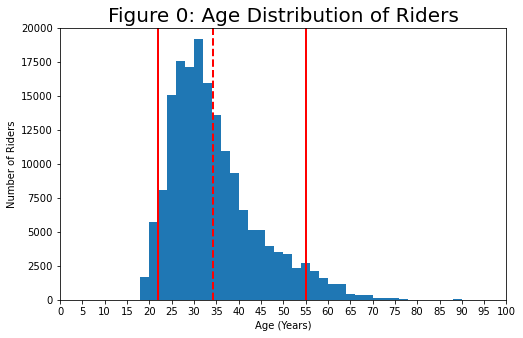

The mean = 34.2 Years Old
The 5th Percentile =  22.0 Years old
The 95th Percentile =  55.0 Years old


In [6]:
# start with a standard-scaled plot
binsize = 2
bins = np.arange(0, filter2['age'].max()+binsize, binsize)

fig0 = plt.figure(figsize=[8, 5])

plt.hist(filter2['age'], bins = bins)
plt.xlim(0, 100)
plt.ylim(0, 20000)
plt.xticks(np.arange(0, 101, step=5))
plt.xlabel('Age (Years)')
plt.ylabel('Number of Riders')
plt.title('Figure 0: Age Distribution of Riders', fontsize=20)

# help adding mean line to plot
# https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
plt.axvline(filter2.age.mean(), color='r', linestyle='dashed', linewidth=2)

# confidence bounds
# help: https://stackoverflow.com/questions/2374640/how-do-i-calculate-percentiles-with-python-numpy
plt.axvline(np.percentile(filter2.age, 95), color='r', linewidth=2)
plt.axvline(np.percentile(filter2.age, 5), color='r', linewidth=2)
plt.show()

# formating help: http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/float.html
# the mean and 95% confidence bounds
print('The mean = {:.1f} Years Old'.format(filter2.age.mean()))
# print('The 95th Percentile is {:.1f} and 5th Percentile is {:.1f}'.format((np.percentile(filter2.age, 95)), (np.percentile(filter2.age, 5)))
print('The 5th Percentile = ',np.percentile(filter2.age, 5), 'Years old')
print('The 95th Percentile = ',np.percentile(filter2.age, 95), 'Years old')

The mean = 34.2 Years Old
The 5th Percentile =  22.0 Years old
The 95th Percentile =  55.0 Years old


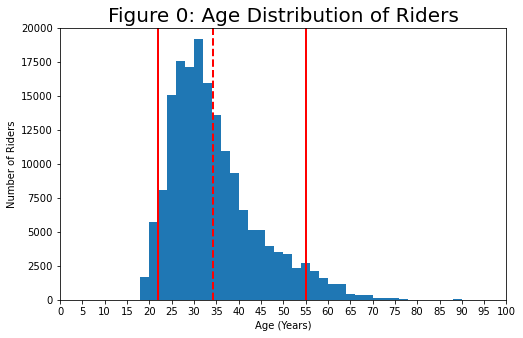

In [7]:
# formating help: http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/float.html
# the mean and 95% confidence bounds
print('The mean = {:.1f} Years Old'.format(filter2.age.mean()))
# print('The 95th Percentile is {:.1f} and 5th Percentile is {:.1f}'.format((np.percentile(filter2.age, 95)), (np.percentile(filter2.age, 5)))
print('The 5th Percentile = ',np.percentile(filter2.age, 5), 'Years old')
print('The 95th Percentile = ',np.percentile(filter2.age, 95), 'Years old')

display(fig0)

## Figure 1 - Top Days to START a Bike Ride

1. The day of the week was reviewed to determine what day had the highest in flux of customers. Most notably Tuesday through Thursday were the most popular days to rent bikes--Thursday being the most with 35176 customers overall. Conversely, Saturday through Monday were the least--Saturday being the least with 15,377 customers. 
2. No transformations additional transformations was required for the data analysis.
3. It was unusual to see the weekend (Sat and Sun) as the lowest count of customers. As compared to Thursday, which is in the middle of the work week--perhaps the job title of customer should be collected to understand if customers are "working professionals" vs "students".
4. No additional cleaning was required for the dataset after initial cleaning, details shown in *__<a href="#assess">Section 2 - Assessing Data (Cleaning and Tidying)</a>__*

In [8]:
count_days = df_oppertunity.groupby('start_day_of_week')['start_day_of_week'].count().sort_values(ascending=False)
count_days

start_day_of_week
THU    35176
TUE    31781
WED    29609
FRI    28962
MON    26807
SUN    15503
SAT    15377
Name: start_day_of_week, dtype: int64

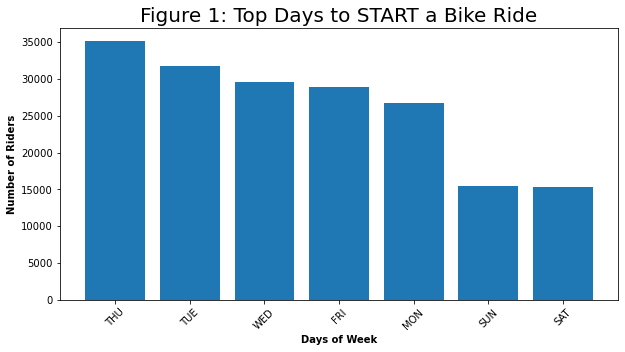

Most popular to least popular days to rent bike
 start_day_of_week
THU    35176
TUE    31781
WED    29609
FRI    28962
MON    26807
SUN    15503
SAT    15377
Name: start_day_of_week, dtype: int64


In [9]:
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
    
x = list(count_days.keys())
xloc = count_days

fig1 = plt.figure(figsize = (10,5))

#creating the plot
plt.bar(x, xloc)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.title('Figure 1: Top Days to START a Bike Ride', fontsize=20);
plt.xlabel('Days of Week', weight='bold');
plt.ylabel('Number of Riders', weight='bold');

plt.show()

print('Most popular to least popular days to rent bike\n',count_days)

Most popular to least popular days to rent bike
 start_day_of_week
THU    35176
TUE    31781
WED    29609
FRI    28962
MON    26807
SUN    15503
SAT    15377
Name: start_day_of_week, dtype: int64


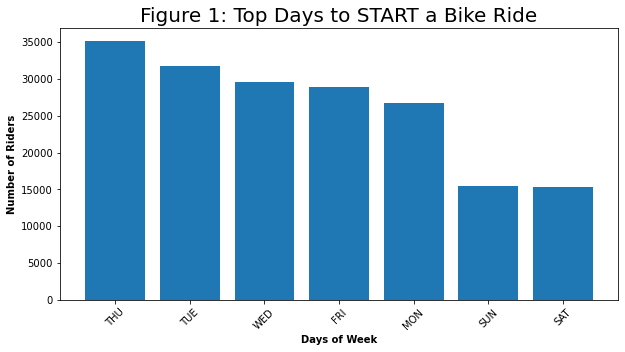

In [10]:
print('Most popular to least popular days to rent bike\n',count_days)
display(fig1)

## Figure 2 - Top Times to START a Bike Ride

1. Unusual points seen with the data that there were customers renting bikes as late as 12am (925 customers) and early as 5am (896 customer--which was the min time count). The average of these two times compared to the 5pm (21,874 customers--which was the max time count), was almost 12 times least popular.
2. No transformations additional transformations was required for the data analysis.  
3. The top 5 times to rent bikes, in order: 5pm, 8am, 6pm, 9am, and 4pm. So looking at this dataset from a different perspective, popular morning times were between 8am-9am, then later in the afternoon/evening popular times were between 4pm-6pm.
4. Additional cleaning of the time data was required. Initially this data was set as a string. The time string was then stripped to its hour portion.

In [11]:
# strip start_hour to just hour portion
df_strip = df_oppertunity
df_strip['hours'] = df_strip['start_hour'].str.slice(stop=2)

count_hours = df_strip.groupby('hours')['hours'].count().sort_values(ascending=False)[:20]
count_hours

hours
17    21847
08    21041
18    16812
09    15886
16    14150
07    10610
19     9873
15     9163
12     8707
13     8531
10     8354
14     8135
11     7872
20     6472
21     4560
06     3484
22     2915
23     1645
00      925
05      896
Name: hours, dtype: int64

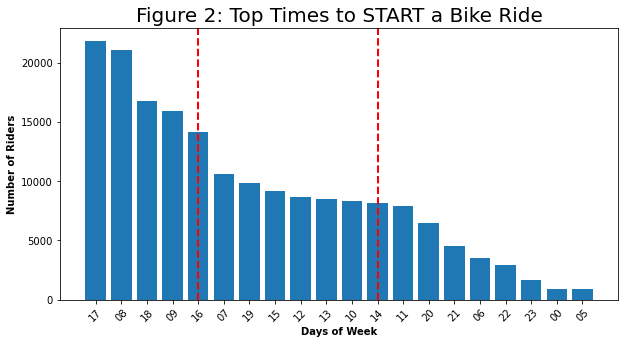

In [12]:
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
x = list(count_hours.keys())
xloc = count_hours

fig2 = plt.figure(figsize = (10,5))

#creating the plot
plt.bar(x, xloc)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.title('Figure 2: Top Times to START a Bike Ride', fontsize=20);
plt.xlabel('Days of Week', weight='bold');
plt.ylabel('Number of Riders', weight='bold');
plt.axvline(x=4, color='r', linestyle='dashed', linewidth=2)
plt.axvline(x=11, color='r', linestyle='dashed', linewidth=2)
plt.show()

#print('Most popular to least popular START times to rent bike\n',count_hours)

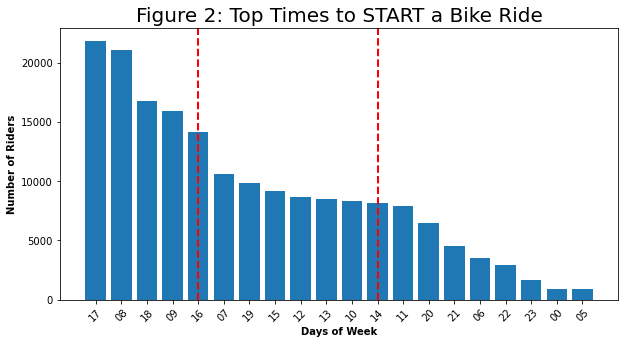

In [13]:
display(fig2)

## Figure 3 - Top Times to END a Bike Ride

1. Interestingly, the data distribution was almost the same as shown in Figure 2. The only difference in order was between, while data was sorted max to min, column 6 to column 11 (as shown by the red lines on the bar chart). This indicates that the time of rides were typically completed within the same hour.    
2. No transformations additional transformations was required for the data analysis.
3. Similarly, the data distribution was almost the same as shown in Figure 2. The only difference in order was between, while data was sorted max to min, column 6 to column 11 (as shown by the red lines on the bar chart).    
4. Additional cleaning of the time data was required. Initially this data was set as a string. The time string was then stripped to its hour portion. This indicates that the time of rides were typically completed within the same hour. 

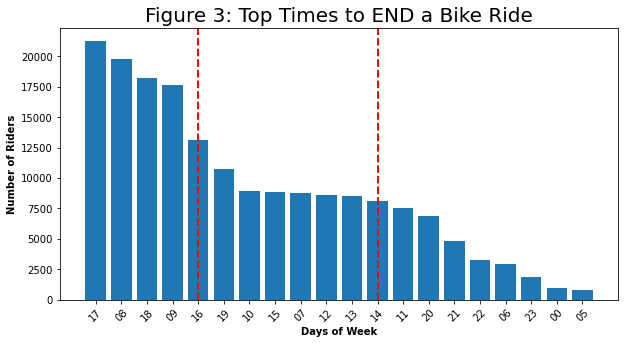

In [14]:
# strip start_hour to just hour portion
df_strip1 = df_oppertunity
df_strip1['hours'] = df_strip1['end_hour'].str.slice(stop=2)

count_hours1 = df_strip1.groupby('hours')['hours'].count().sort_values(ascending=False)[:20]

#plotting
x = list(count_hours1.keys())
xloc = count_hours1

fig3 = plt.figure(figsize = (10,5))

#creating the plot
plt.bar(x, xloc)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.title('Figure 3: Top Times to END a Bike Ride', fontsize=20);
plt.xlabel('Days of Week', weight='bold');
plt.ylabel('Number of Riders', weight='bold');
plt.axvline(x=4, color='r', linestyle='dashed', linewidth=2)
plt.axvline(x=11, color='r', linestyle='dashed', linewidth=2)
plt.show()

#print('Most popular to least popular END times to rent bike\n',count_hours1)

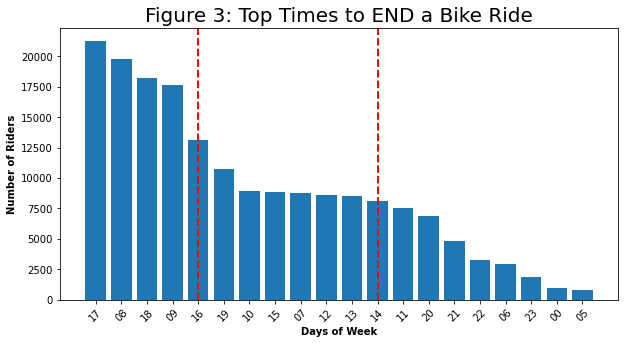

In [15]:
display(fig3)

## Figure 4 - Time Spent Riding Bike

1. This analysis was a verification step to the posit stated from the discussion of Figure 3. Figure 4 confirms that most ride durations on average was about 12.1 minutes long. The 5th percentile ride duration being 2.8 minutes, and the 95th percentile ride duration being 26.2 minutes. 
2. No transformations additional transformations was required for the data analysis.
1. When review the feature of time, hours was not reviewed in greater detail because Figure 4 confirms that most ride durations on average was about 12.1 minutes long. In fact, the 5th percentile ride duration being 2.8 minutes, and the 95th percentile ride duration being 26.2 minutes. Therefore, it was more meaningful to do a distribution of ride duration as minutes instead of hours.
2. No additional cleaning was required for the dataset after initial cleaning, details shown in *__<a href="#assess">Section 2 - Assessing Data (Cleaning and Tidying)</a>__*    

In [16]:
# take a look at stat distribution
df_oppertunity.describe()

,duration_hr,duration_min,member_birth_year,age
count,183215.000000,183215.000000,183215.000000,183215.000000
mean,0.201639,12.098367,1895.288475,32.607909
std,0.498633,29.917978,412.013105,12.067822
min,0.016944,1.016667,0.000000,0.000000
25%,0.090278,5.416667,1979.000000,26.000000
50%,0.142778,8.566667,1987.000000,31.000000
75%,0.221111,13.266667,1992.000000,38.000000
max,23.734444,1424.066667,2001.000000,99.000000


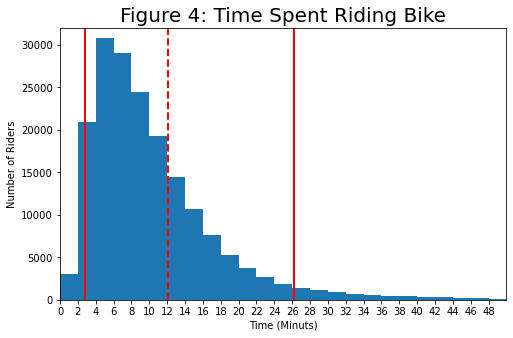

The mean = 12.1 minutes
The 5th Percentile = 2.8 minutes long
The 95th Percentile = 26.2 minutes long


In [17]:
filter2 = df_oppertunity

# start with a standard-scaled plot
binsize = 2
bins = np.arange(0, filter2['duration_min'].max()+binsize, binsize)

fig4 = plt.figure(figsize=[8, 5])

plt.hist(filter2['duration_min'], bins = bins)
plt.xlim(0, 50)
plt.ylim(0, 32000)
plt.xticks(np.arange(0, 50, step=2))
plt.xlabel('Time (Minuts)')
plt.ylabel('Number of Riders')
plt.title('Figure 4: Time Spent Riding Bike', fontsize=20)
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees

# help adding mean line to plot
# https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
plt.axvline(filter2.duration_min.mean(), color='r', linestyle='dashed', linewidth=2)

# confidence bounds
# help: https://stackoverflow.com/questions/2374640/how-do-i-calculate-percentiles-with-python-numpy
plt.axvline(np.percentile(filter2.duration_min, 95), color='r', linewidth=2)
plt.axvline(np.percentile(filter2.duration_min, 5), color='r', linewidth=2)
plt.show()

# formating help: http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/float.html
# the mean and 95% confidence bounds
print('The mean = {:.1f} minutes'.format(filter2.duration_min.mean()))
# print('The 95th Percentile is {:.1f} and 5th Percentile is {:.1f}'.format((np.percentile(filter2.age, 95)), (np.percentile(filter2.age, 5)))
#the5th = np.percentile(filter2.duration_min, 5)
print('The 5th Percentile = {:.1f} minutes long'.format(np.percentile(filter2.duration_min, 5)))
print('The 95th Percentile = {:.1f} minutes long'.format(np.percentile(filter2.duration_min, 95)))

The mean = 12.1 minutes
The 5th Percentile = 2.8 minutes long
The 95th Percentile = 26.2 minutes long


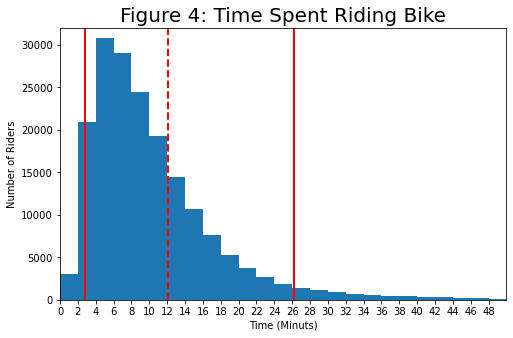

In [18]:
# formating help: http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/float.html
# the mean and 95% confidence bounds
print('The mean = {:.1f} minutes'.format(filter2.duration_min.mean()))
# print('The 95th Percentile is {:.1f} and 5th Percentile is {:.1f}'.format((np.percentile(filter2.age, 95)), (np.percentile(filter2.age, 5)))
#the5th = np.percentile(filter2.duration_min, 5)
print('The 5th Percentile = {:.1f} minutes long'.format(np.percentile(filter2.duration_min, 5)))
print('The 95th Percentile = {:.1f} minutes long'.format(np.percentile(filter2.duration_min, 95)))

display(fig4)

In [19]:
print('Distribution of Ride Duration - UNFILTERED\n', filter2.duration_min.describe())
print('\n=================\n')
filter_30min = filter2[filter2['duration_min'] < 30]
print('Distribution of Ride Duration - FILTERED\n', filter_30min.duration_min.describe())

Distribution of Ride Duration - UNFILTERED
 count    183215.000000
mean         12.098367
std          29.917978
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64


Distribution of Ride Duration - FILTERED
 count    176457.000000
mean          9.570218
std           5.631750
min           1.016667
25%           5.316667
50%           8.316667
75%          12.566667
max          29.983333
Name: duration_min, dtype: float64


## Bivariate Exploration

## Figure 5 - Age Distribution of Different Genders

In [20]:
# create new df reference for prototyping
filter1 = df_oppertunity

# remove zeros from age data
filter2 = filter1[filter1['age'] > 1]

genderVSage = filter2.groupby('member_gender')['age'].count().sort_values(ascending=False)
genderVSage.head(5)

member_gender
Male      130443
Female     40791
Other       3646
Name: age, dtype: int64

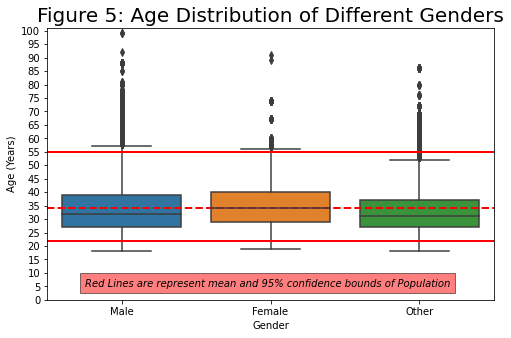

In [21]:
fig5 = plt.figure(figsize = (8, 5))

sns.boxplot(y='age', x='member_gender', data=filter2)

plt.xlabel('Gender')
plt.ylabel('Age (Years)')
plt.title('Figure 5: Age Distribution of Different Genders', fontsize=20)
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees

yMin = 0
yMax = 101
plt.ylim(yMin, yMax)
plt.yticks(np.arange(yMin, yMax, step=5))
# help: https://stats.stackexchange.com/questions/3476/how-to-name-the-ticks-in-a-python-matplotlib-boxplot
plt.xticks([0, 1, 2], ['Male', 'Female', 'Other']) # Needs review

# help adding mean line to plot
# https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
plt.axhline(filter2.age.mean(), color='r', linestyle='dashed', linewidth=2)

# confidence bounds
# help: https://stackoverflow.com/questions/2374640/how-do-i-calculate-percentiles-with-python-numpy
plt.axhline(np.percentile(filter2.age, 95), color='r', linewidth=2)
plt.axhline(np.percentile(filter2.age, 5), color='r', linewidth=2)

# text location and annotation notes
# help: https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib
# https://matplotlib.org/3.1.0/tutorials/text/text_intro.html
plt.text(-0.25, 5, 'Red Lines are represent mean and 95% confidence bounds of Population', 
         style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})

plt.show()

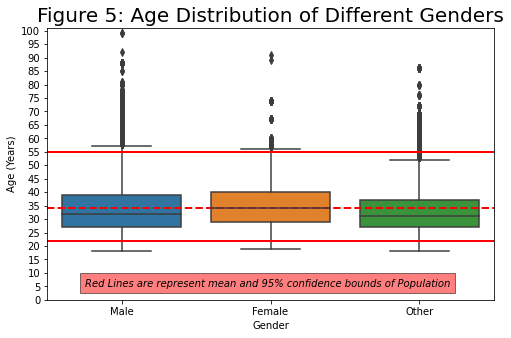

In [22]:
display(fig5)

## Figure 6 - Duration of Ride Distribution of Different Genders

In [23]:
# leverage data frame from 'Gender vs Age'
filter_30min = filter2[filter2['duration_min'] < 30]
print('Distribution of Ride Duration - FILTERED\n', filter_30min.duration_min.describe())

# remove minutes OVER 30min, based on distrubtion data before
assert filter_30min.duration_min.max() < 31, "There's ride duration data that is NOT under 30 mins!"


# remove zeros from age data
filter_30min_genderZero = filter_30min[filter_30min.member_gender.str.contains(r'[MaleFemaleOther]')]

genderVSduration = filter_30min_genderZero.groupby('member_gender')['duration_min'].count().sort_values(ascending=False)
genderVSduration.head(5)

Distribution of Ride Duration - FILTERED
 count    168857.000000
mean          9.520964
std           5.606826
min           1.016667
25%           5.283333
50%           8.266667
75%          12.516667
max          29.983333
Name: duration_min, dtype: float64


member_gender
Male      126365
Female     39091
Other       3401
Name: duration_min, dtype: int64

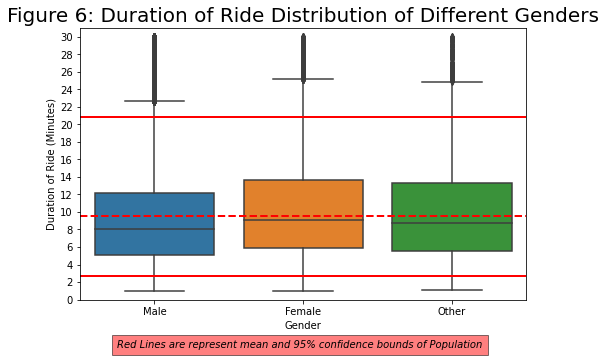

In [24]:
fig6 = plt.figure(figsize = (8, 5))

sns.boxplot(y='duration_min', x='member_gender', data=filter_30min_genderZero)

plt.xlabel('Gender')
plt.ylabel('Duration of Ride (Minutes)')
plt.title('Figure 6: Duration of Ride Distribution of Different Genders', fontsize=20)
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees

yMin = 0
yMax = 31
plt.ylim(yMin, yMax)
plt.yticks(np.arange(yMin, yMax, step=2))
# help: https://stats.stackexchange.com/questions/3476/how-to-name-the-ticks-in-a-python-matplotlib-boxplot
plt.xticks([0, 1, 2], ['Male', 'Female', 'Other']) # Needs review

# help adding mean line to plot
# https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
plt.axhline(filter_30min_genderZero.duration_min.mean(), color='r', linestyle='dashed', linewidth=2)

# help: https://matplotlib.org/3.1.0/tutorials/text/text_intro.html
plt.text(-0.25, -5.5, 'Red Lines are represent mean and 95% confidence bounds of Population', 
         style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})

# confidence bounds
# help: https://stackoverflow.com/questions/2374640/how-do-i-calculate-percentiles-with-python-numpy
plt.axhline(np.percentile(filter_30min_genderZero.duration_min, 5), color='r', linewidth=2)
plt.axhline(np.percentile(filter_30min_genderZero.duration_min, 95), color='r', linewidth=2)

plt.show()

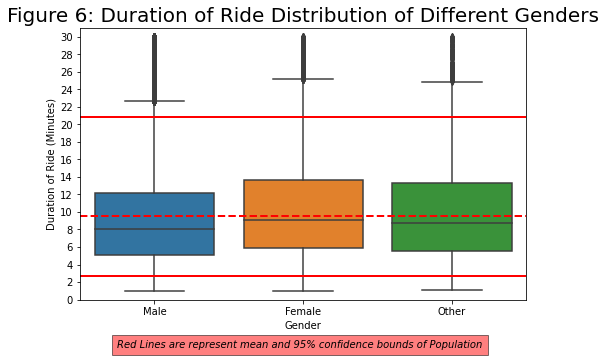

In [25]:
display(fig6)

### Discussion - Bivariate Exploration

It was interesting to note that the few customers that identified their gender indicated a gender of "other". However, the data scientist respects the gender identity of those participating in the bike renting service.

When reviewing gender to the age of the customer population, as shown in Figures 5, there appears no discernable difference between the different genders. The female population may be representative of the total mean of about 35 years old, and slightly higher when compared to male and other classifications. However, a t-test is required to confirm if these differences are statistically significant.

When reviewing gender to the ride duration population, as shown in Figures 6, similarities in spread between female and other classifications was noted. Average ride time between female and other classifications being about 9.5 minutes. When comparing to the male population, the male group tended to have shorter rides. However, a standard t-test would need to be performed for confirmation.

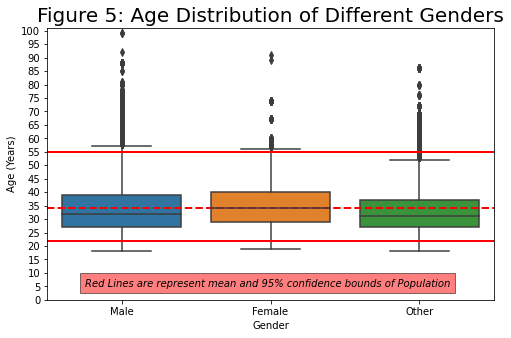

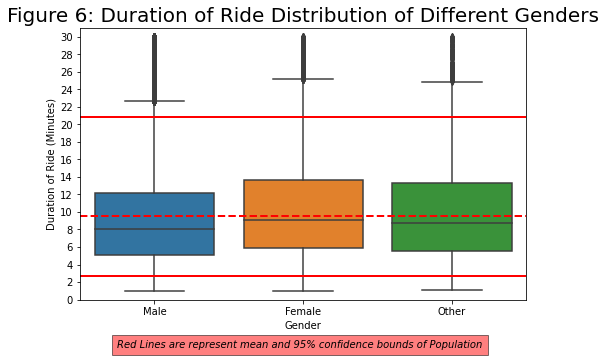

In [26]:
display(fig5)
display(fig6)

## Multivariate Exploration

## Figure 7 - Age Distribution of Different Genders



In [27]:
# get data and quick cleaning
# make a copy for futher manipulation
df_multivariate = df[['user_type', 'start_day_of_week', 'end_day_of_week', 
                     'start_hour', 'end_hour', 'member_gender' ]].copy()
df_multivariate.head(2)

,user_type,start_day_of_week,end_day_of_week,start_hour,end_hour,member_gender
0,Customer,THU,FRI,17:32:10.145000,08:01:55.975000,Male
1,Customer,THU,FRI,18:53:21.789000,06:42:03.056000,0


In [28]:
# strip start_hour to just hour portion
df_multivariate['hours'] = df_multivariate['start_hour'].str.slice(stop=2)

In [29]:
# help categorical data
# https://stackoverflow.com/questions/47255746/change-order-on-x-axis-for-matplotlib-chart
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

df_multivariate['ORDERED_DAYS'] = pd.Categorical(df_multivariate['start_day_of_week'], 
                                           categories=["SAT", "FRI", "THU", "WED", "TUES", "MON", "SUN"], ordered=True)
df_multivariate.head(2)

,user_type,start_day_of_week,end_day_of_week,start_hour,end_hour,member_gender,hours,ORDERED_DAYS
0,Customer,THU,FRI,17:32:10.145000,08:01:55.975000,Male,17,THU
1,Customer,THU,FRI,18:53:21.789000,06:42:03.056000,0,18,THU


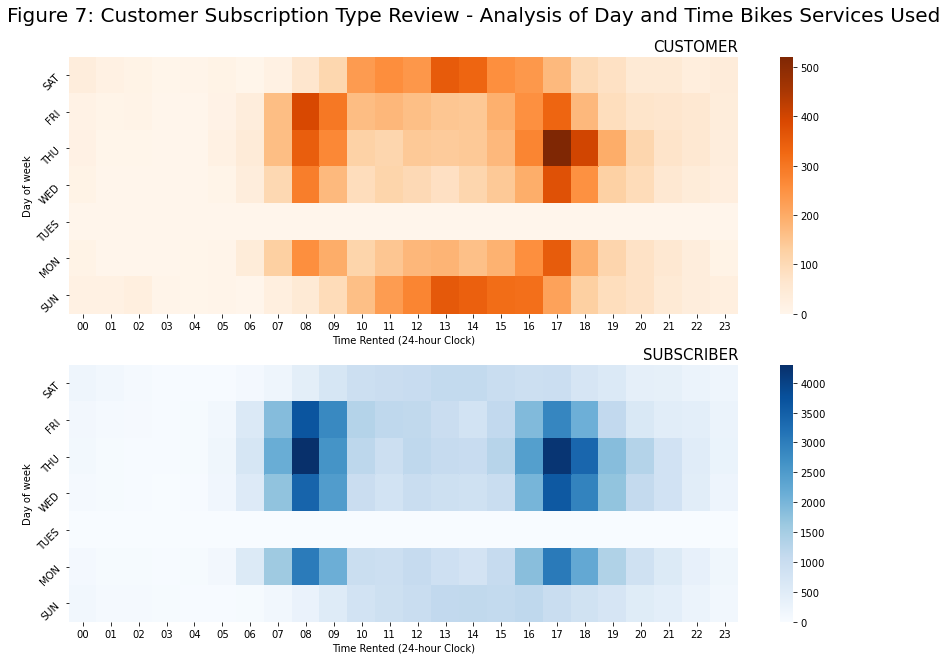

In [30]:
# color pallet help:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# color blindness considerations:
# https://www.tableau.com/about/blog/2016/4/examining-data-viz-rules-dont-use-red-green-together-53463#:~:text=Use%20a%20colorblind%2Dfriendly%20palette%20when%20appropriate&text=For%20example%2C%20blue%2Forange%20is,blue%20to%20someone%20with%20CVD.
fig7 = plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
customers = df_multivariate.query('user_type == "Customer"')
count1 = customers.groupby(['ORDERED_DAYS', 'hours']).size()
count1 = count1.reset_index(name='count')
count1 = count1.pivot(index='ORDERED_DAYS', columns='hours', values='count')

# make plot blue/orange for folks that may be color blind
sns.heatmap(count1, cmap="Oranges");
plt.title('CUSTOMER', loc='right', fontsize=15);
plt.xlabel('Time Rented (24-hour Clock)', fontsize=10);
plt.ylabel('Day of week', fontsize=10);
plt.yticks(rotation = 45) # Rotates Axis Ticks

plt.subplot(2, 1, 2)
subscribers = df_multivariate.query('user_type == "Subscriber"')
count2 = subscribers.groupby(['ORDERED_DAYS', 'hours']).size()
count2 = count2.reset_index(name='count')
count2 = count2.pivot(index='ORDERED_DAYS', columns='hours', values='count')

# make plot blue/orange for folks that may be color blind
sns.heatmap(count2, cmap="Blues");
plt.title('SUBSCRIBER', loc='right', fontsize=15);
plt.xlabel('Time Rented (24-hour Clock)', fontsize=10);
plt.ylabel('Day of week', fontsize=10);
plt.yticks(rotation = 45) # Rotates Axis Ticks

plt.subplots_adjust(top=0.91)
plt.suptitle('Figure 7: Customer Subscription Type Review - Analysis of Day and Time Bikes Services Used', fontsize=20);

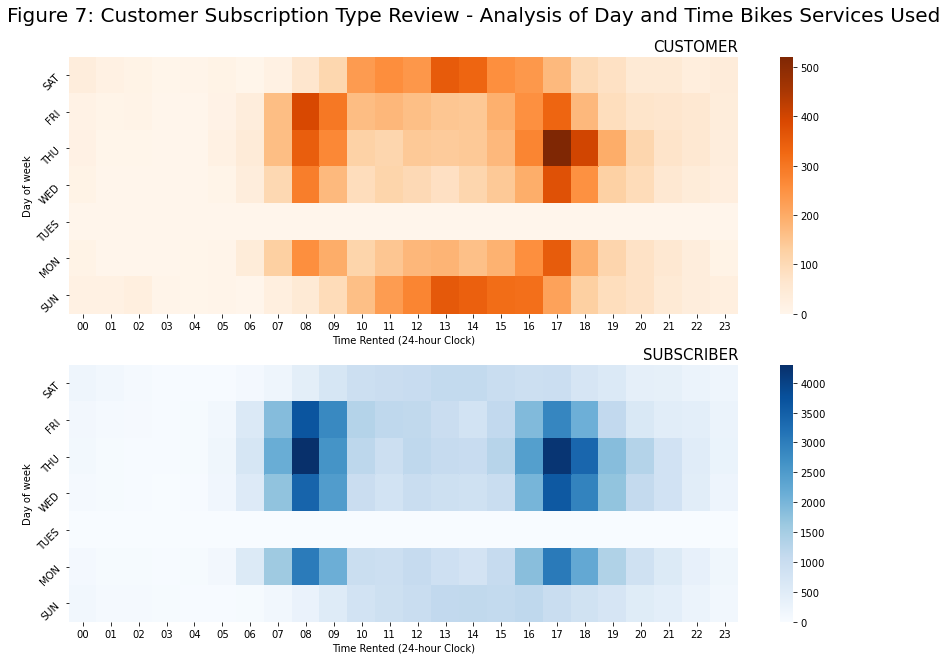

In [31]:
display(fig7)

## Figure 8 - Duration of Ride Distribution of Different Genders



In [32]:
# remove zeros from age data
df_multivariate_genderZero = df_multivariate[df_multivariate.member_gender.str.contains(r'[MaleFemaleOther]')]
df_multivariate_genderZero.head(2)

,user_type,start_day_of_week,end_day_of_week,start_hour,end_hour,member_gender,hours,ORDERED_DAYS
0,Customer,THU,FRI,17:32:10.145000,08:01:55.975000,Male,17,THU
2,Customer,THU,FRI,12:13:13.218000,05:24:08.146000,Male,12,THU


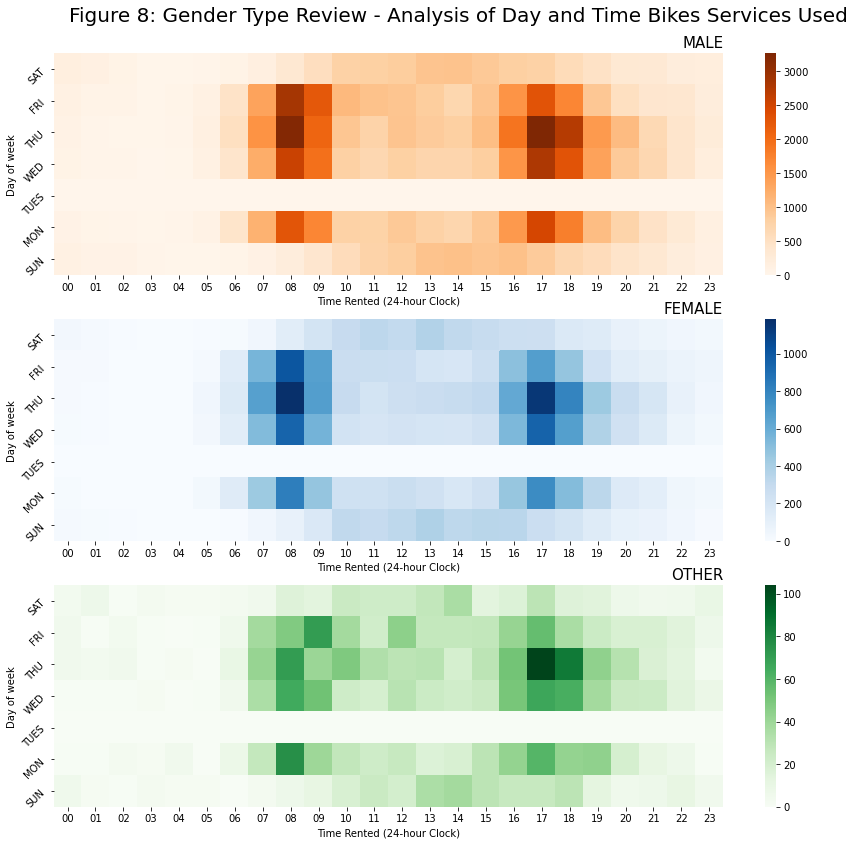

In [33]:
# color pallet help:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# color blindness considerations:
# https://www.tableau.com/about/blog/2016/4/examining-data-viz-rules-dont-use-red-green-together-53463#:~:text=Use%20a%20colorblind%2Dfriendly%20palette%20when%20appropriate&text=For%20example%2C%20blue%2Forange%20is,blue%20to%20someone%20with%20CVD.
fig8 = plt.figure(figsize=(15,13)) #was height was 15 in report

######FIRST SUBPLOT#######
plt.subplot(3, 1, 1)
customers = df_multivariate_genderZero.query('member_gender == "Male"')
count1 = customers.groupby(['ORDERED_DAYS', 'hours']).size()
count1 = count1.reset_index(name='count')
count1 = count1.pivot(index='ORDERED_DAYS', columns='hours', values='count')

# make plot blue/orange for folks that may be color blind
sns.heatmap(count1, cmap="Oranges");
plt.title('MALE', loc='right', fontsize=15);
plt.xlabel('Time Rented (24-hour Clock)', fontsize=10);
plt.ylabel('Day of week', fontsize=10);
plt.yticks(rotation = 45) # Rotates Axis Ticks

######SECOND SUBPLOT#######
plt.subplot(3, 1, 2)
subscribers = df_multivariate_genderZero.query('member_gender == "Female"')
count2 = subscribers.groupby(['ORDERED_DAYS', 'hours']).size()
count2 = count2.reset_index(name='count')
count2 = count2.pivot(index='ORDERED_DAYS', columns='hours', values='count')

# make plot blue/orange for folks that may be color blind
sns.heatmap(count2, cmap="Blues");
plt.title('FEMALE', loc='right', fontsize=15);
plt.xlabel('Time Rented (24-hour Clock)', fontsize=10);
plt.ylabel('Day of week', fontsize=10);
plt.yticks(rotation = 45) # Rotates Axis Ticks

######THIRD SUBPLOT#######
plt.subplot(3, 1, 3)
customers = df_multivariate_genderZero.query('member_gender == "Other"')
count1 = customers.groupby(['ORDERED_DAYS', 'hours']).size()
count1 = count1.reset_index(name='count')
count1 = count1.pivot(index='ORDERED_DAYS', columns='hours', values='count')

# make plot blue/orange for folks that may be color blind
sns.heatmap(count1, cmap="Greens");
plt.title('OTHER', loc='right', fontsize=15);
plt.xlabel('Time Rented (24-hour Clock)', fontsize=10);
plt.ylabel('Day of week', fontsize=10);
plt.yticks(rotation = 45) # Rotates Axis Ticks

#############
plt.subplots_adjust(top=0.93)
plt.suptitle('Figure 8: Gender Type Review - Analysis of Day and Time Bikes Services Used', fontsize=20);

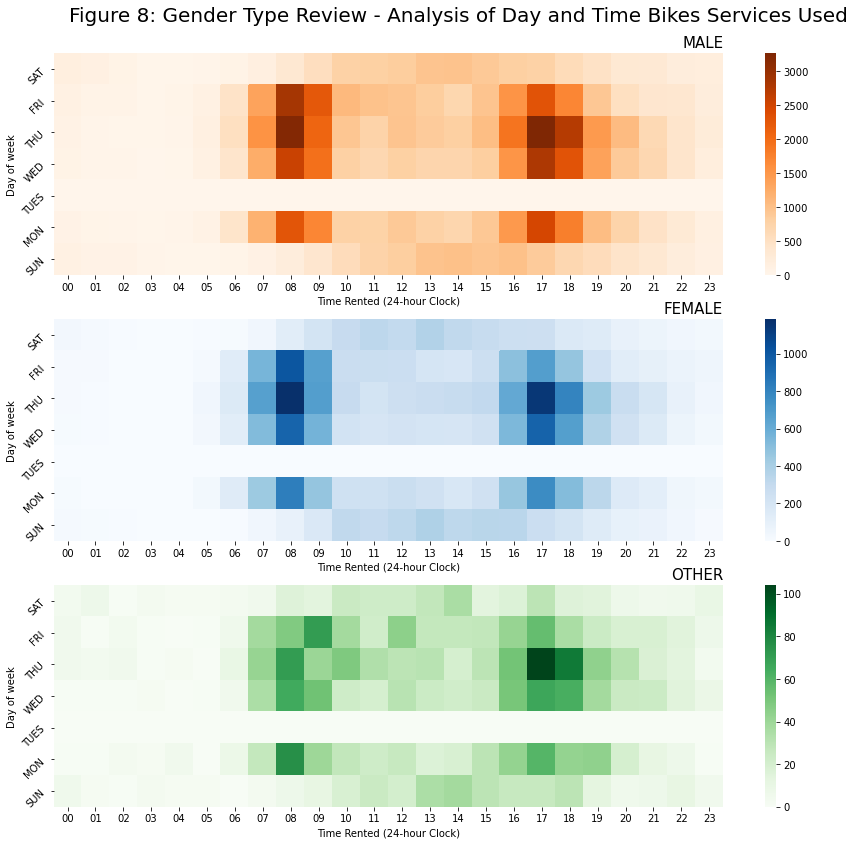

In [34]:
display(fig8)

### Discussion - Multivariate Exploration

#### Figure 2 and 7 Comparison and Observations

Multivariate exploration of subscriber vs non-subscriber, in respects to time and day bikes were rented, verifies prior observations noted in univariate discussion. Comparing Figure 2 (the univariate analysis of the distribution of times when bikes were rented) to Figure 7, the multivariate analysis confirms that most customers tend to rent bikes between 8am-9am, then later in the afternoon/evening popular times were between 4pm-6pm. However, when making the count of customers as the z-axis, and plotting those counts on a time-rented to day-rented x-y plan, it is striking to see that this assertion applies generally to Wednesdays to Fridays. Furthermore, when comparing Figure 1 (the univariate analysis of the top days to rent bikes) the multivariate analysis shown in Figure 7 shows almost no riders renting bikes on Tuesdays (which was the second most popular day customers rented bikes)! This observation can be explored further in a future analysis of the data.
    
The observations noted above is applicable to both customer (non-subscriber) and subscriber riders. The only difference notated was that customer (or non-subscribers) tend to rent bikes more frequently on the weekends (Saturday and Sunday) as opposed to riders with a subscription.

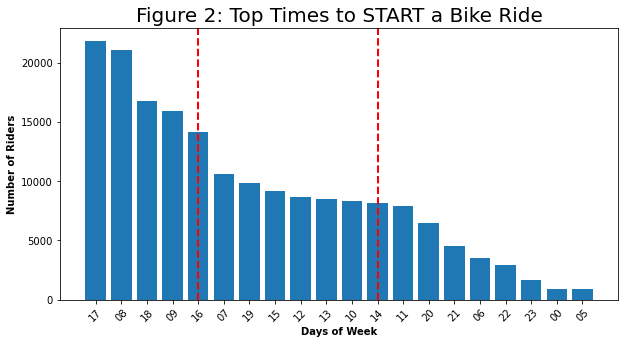

In [35]:
display(fig2)

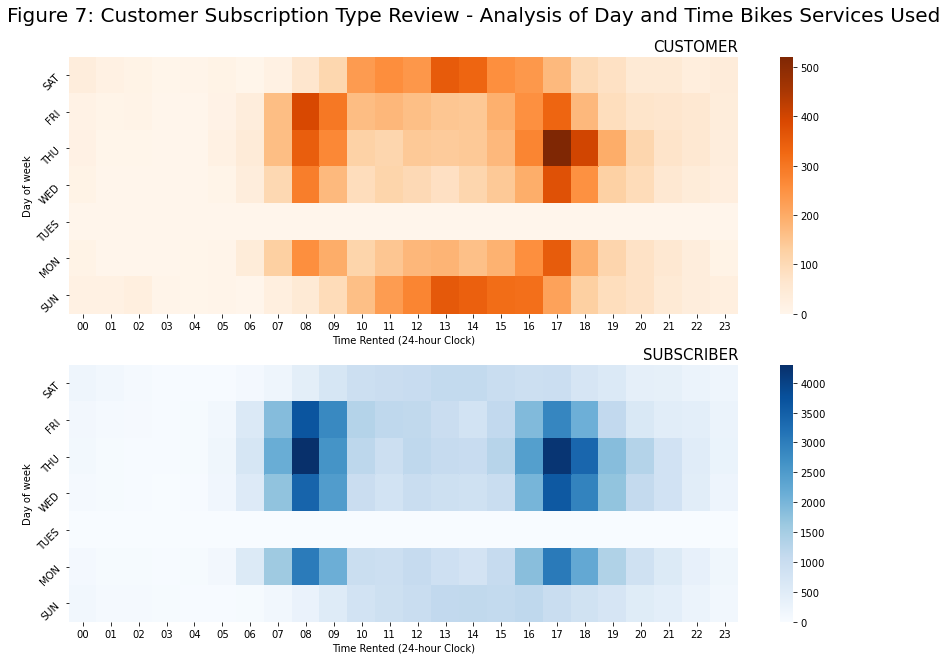

In [36]:
display(fig7)

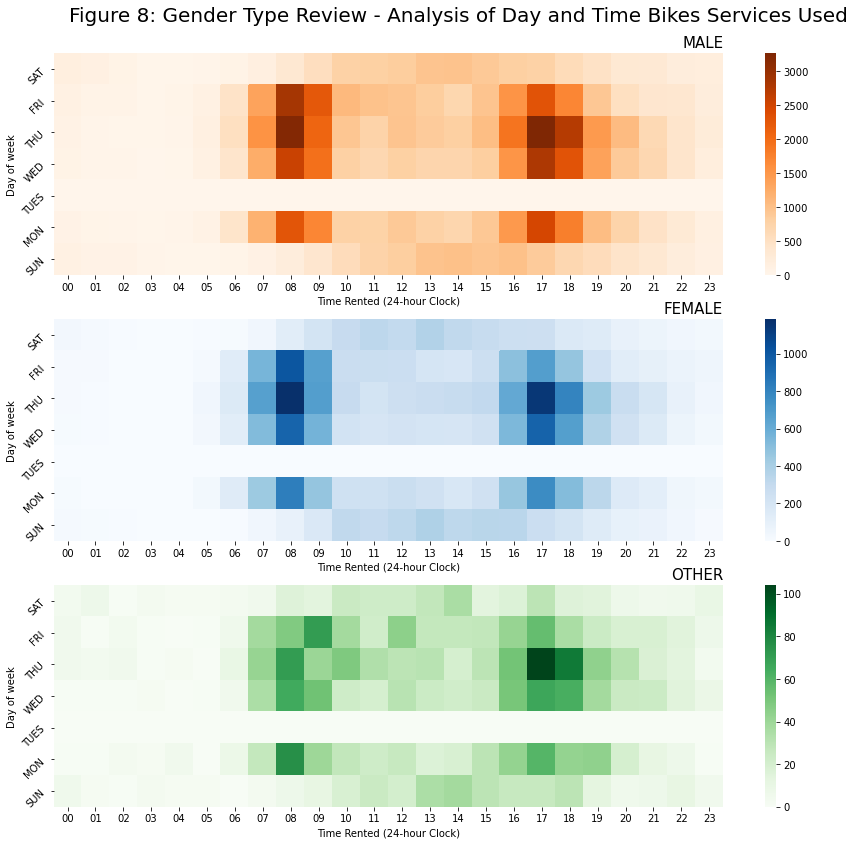

In [37]:
display(fig8)

#### Figure 7 and 8 Comparison and Observations

Taking the extension of this analysis above and applying it to the identified genders in this study indicates similar heatmaps between males and females, as shown in Figure 8. The male and female heatmap, compared to Figure 7, tend to follow the heatmap pattern of a subscriber identification. The other gender classification tended to be more spread and did not have the same heatmap shape of the males and females. This may indicate that the other classification is a part of both the non-subscriber and subscriber identification groups. This observation can be explored further in a future analysis of the data.

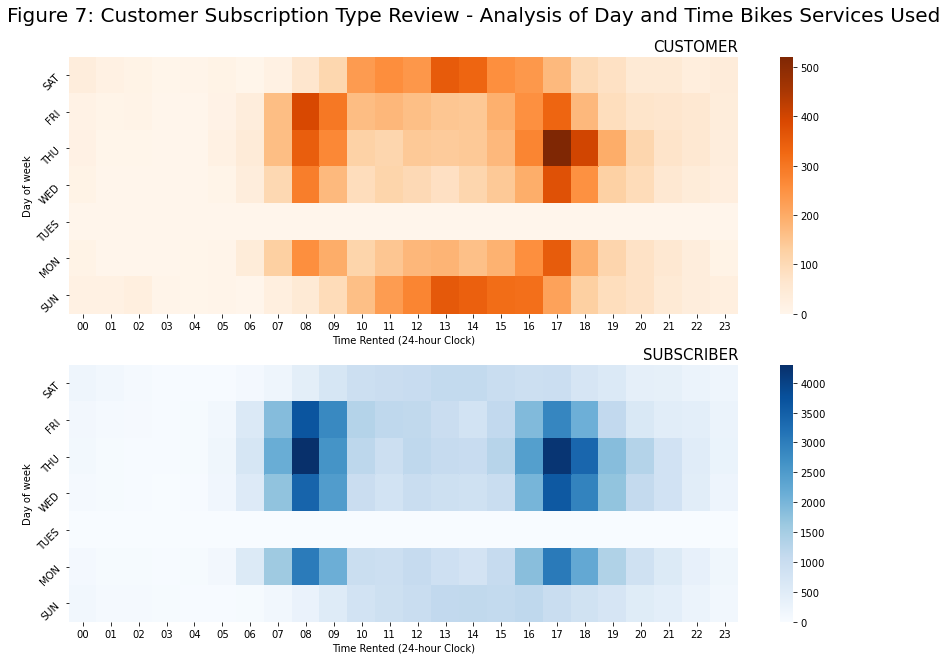

In [38]:
display(fig7)

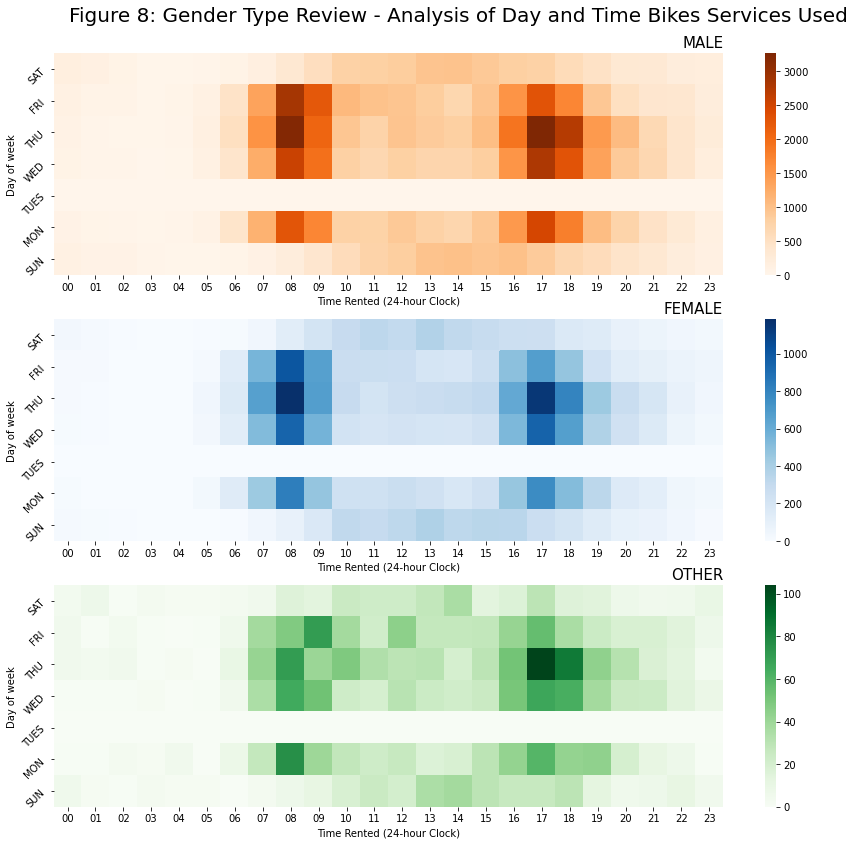

In [39]:
display(fig8)

# Conclusion

In conclusion, when review the question asked at the initial phase of this study, the data scientist has the following recommendations for the following questions below:

<u>Questions to consider and recommendations:</u>
1. As a customer, when is it a good time to schedule a bike ride to avoid the rush (high influx of customers)?
    - Customers that want to have a leisure ride with the least amount of people riding bikes should consider renting bikes on Saturdays and Sundays. 


2. As a shop owner, how should you strategically schedule your employees to ensure enough staff is present to assist customers?
    - The owner should consider having staff members ready for high customer rate seen between Wednesday to Thursdays. However, further data and analysis is required to determine if Tuesdays is truly a high frequency rental day. Discounts can be applied to Saturdays and Sundays to encourage customers to rent on the weekend.

3. As a shop owner, how can I exploit customer renting patterns to adjust prices of rides (e.g., bike-use-time/hr) or create discounts?
    - The owner can explore targeted advertisement to attract age groups around 18 and 25. Further data is required, but this age group may have potential revenue when review Figure 5. Additionally, targeted advertisement to genders may not be required because the spread of these types of customers are similar, albeit additional statistical t-tests are required to determine if this would in fact be significant. 
    - The shop owner should also consider and review internally why subscribers to bike services tend to rent bikes less on the weekends. Further data is required, but this lower renting participation rate from subscribers, as shown in Figure 7, maybe indicative that subscribers are working professionals that uses these bikes to work Monday-Friday.

# End of Data Project!

Made with ❤️ by Jhon!

Further impovements include...
1. Validation statements using ```assert``` clauses to confirm that data manipuation is correct during cleaning stage
2. More plots exploring data
3. Adding helpful annotations to plots
4. Hypothesis Testing, to determine the statisticaly significance of various features (age, gender, etc.) to determine if different times/dates affect customer interaction
5. Multivariate and univariate comparison and confirmation
